In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

%matplotlib inline
plt.style.use('ggplot')

In [2]:
!ls data/

AB_NYC_2019.csv    New_York_City_.png


In [147]:
df = pd.read_csv('data/AB_NYC_2019.csv')

In [148]:
df.shape

(48895, 16)

In [149]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [151]:
# According to the df.info(), some cloumns miss some values
# Double check
df.isnull().sum()


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [152]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Quikly visulize

In [153]:
#move the "price" column to the end
cols = df.columns.tolist()
cols

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']

In [154]:
df = df.reindex(columns=['id',
         'name',
         'host_id',
         'host_name',
         'neighbourhood_group',
         'neighbourhood',
         'latitude',
         'longitude',
         'room_type',
         'minimum_nights',
         'number_of_reviews',
         'last_review',
         'reviews_per_month',
         'calculated_host_listings_count',
         'availability_365',
         'price'])

In [155]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,2019-05-21,0.38,2,355,225
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,NaN,NaN,1,365,150
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,2019-07-05,4.64,1,194,89
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,2018-11-19,0.10,1,0,80


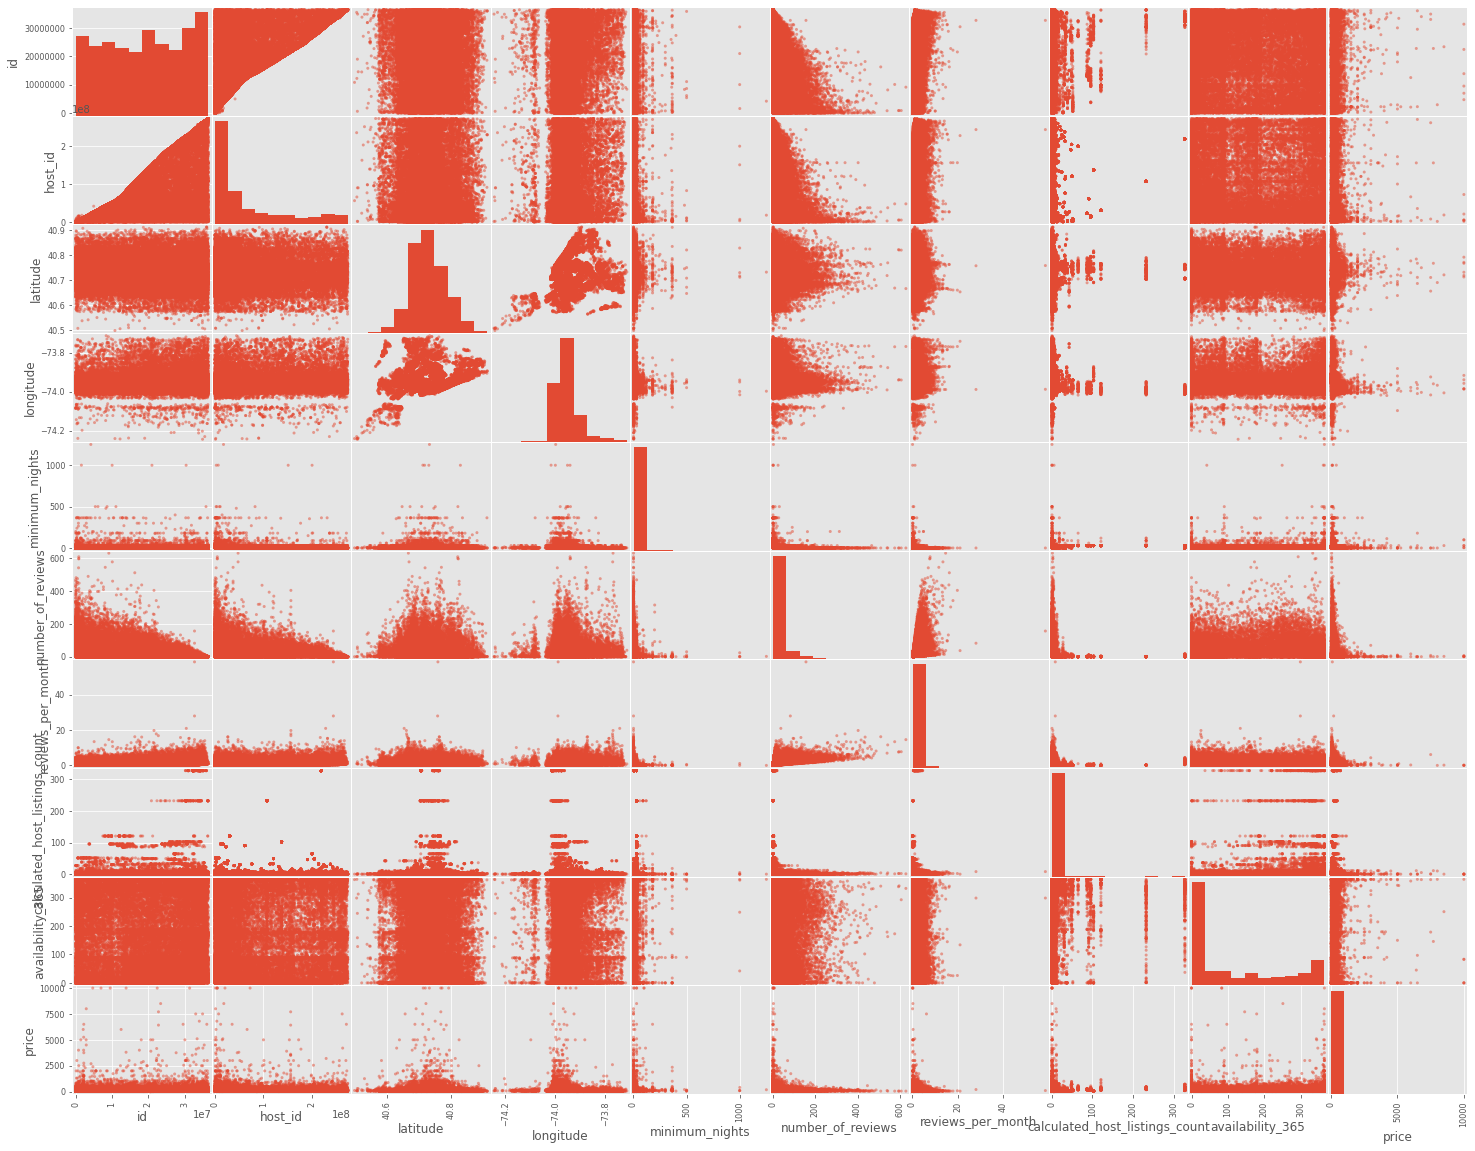

In [32]:
pd.plotting.scatter_matrix(df, figsize=(25, 20))
plt.show()

In [240]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,2018-10-19,0.21,6,365,149


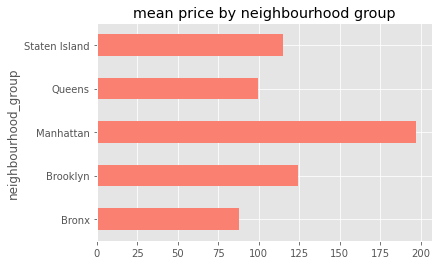

In [139]:
df.groupby('neighbourhood_group').mean()['price'].plot(kind='barh',color = 'salmon',title = 'mean price by neighbourhood group')
plt.savefig('mean_price_by_neighbourhood_group.png')

In [140]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

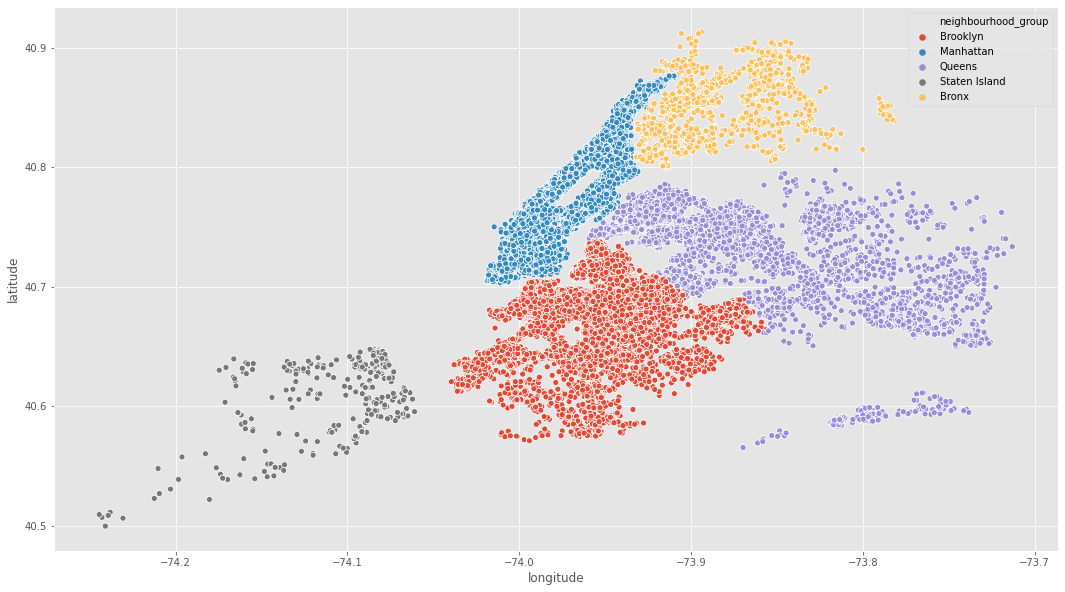

In [141]:
import seaborn as sns

NYC_img=plt.imread('data/New_York_City_.png', 0)
fig, ax = plt.subplots(figsize = (18,10))

ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group')
ax.legend()
plt.savefig('map_of_neighbourhood_group.png')


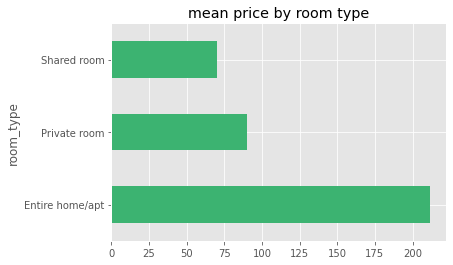

In [142]:
df.groupby('room_type').mean()['price'].plot(kind='barh', color ='mediumseagreen', title = 'mean price by room type')
plt.savefig('mean_price_by_room_type.png')

In [143]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

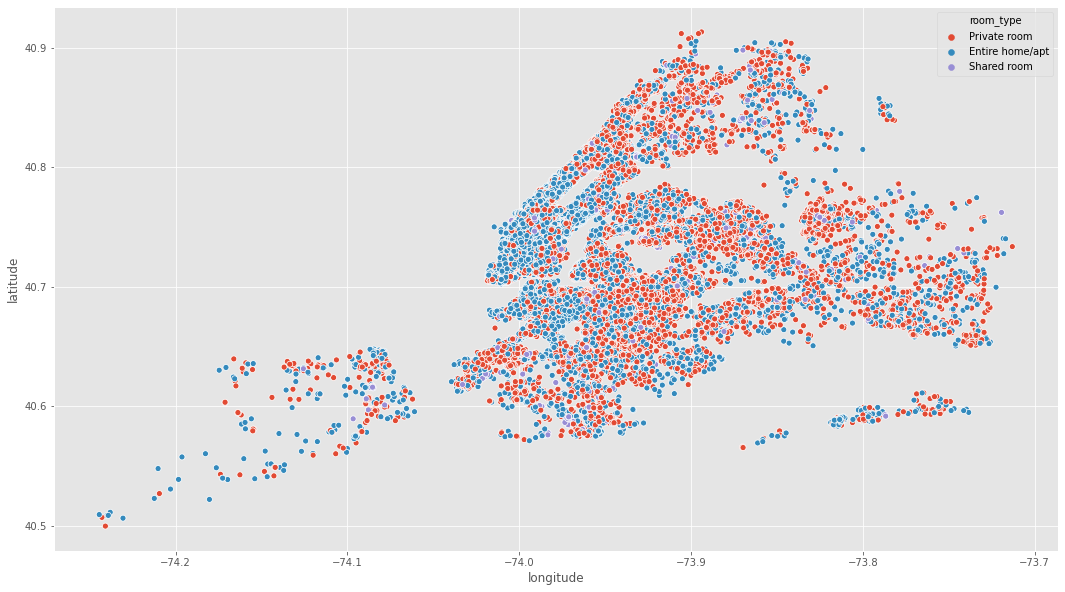

In [130]:
fig, ax = plt.subplots(figsize = (18,10))

ax = sns.scatterplot(data=df, x='longitude', y='latitude', hue='room_type')
plt.savefig('map_of_room_type.png')

In [49]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Woodrow                  1
Willowbrook              1
New Dorp                 1
Rossville                1
Name: neighbourhood, Length: 221, dtype: int64

In [97]:
price_mean=df['price'].mean()
price_mean

152.7206871868289

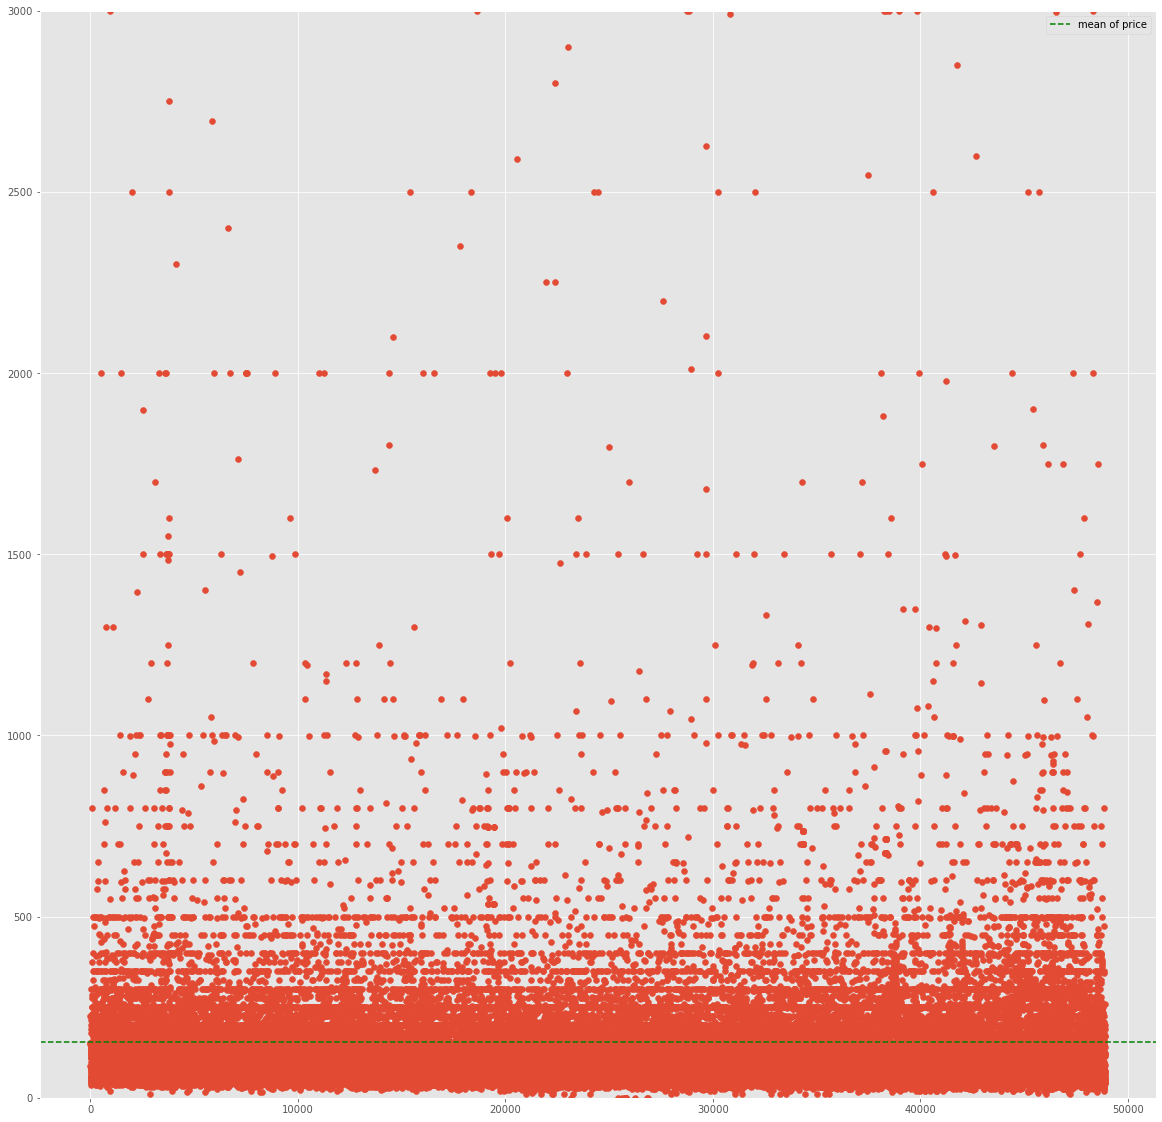

In [108]:
fig, ax = plt.subplots(figsize=(20,20))
price_mean
ax.scatter(x=df.index.tolist(), y=df.price)
ax.axhline(y=price_mean, color='green', linestyle='--',label ='mean of price')
ax.set_ylim(0, 3000)
ax.legend()

#### WordCloud


In [112]:
stopwords = set(STOPWORDS) 
name_words = '' 
for val in df.name: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    name_words += " ".join(tokens)+" "

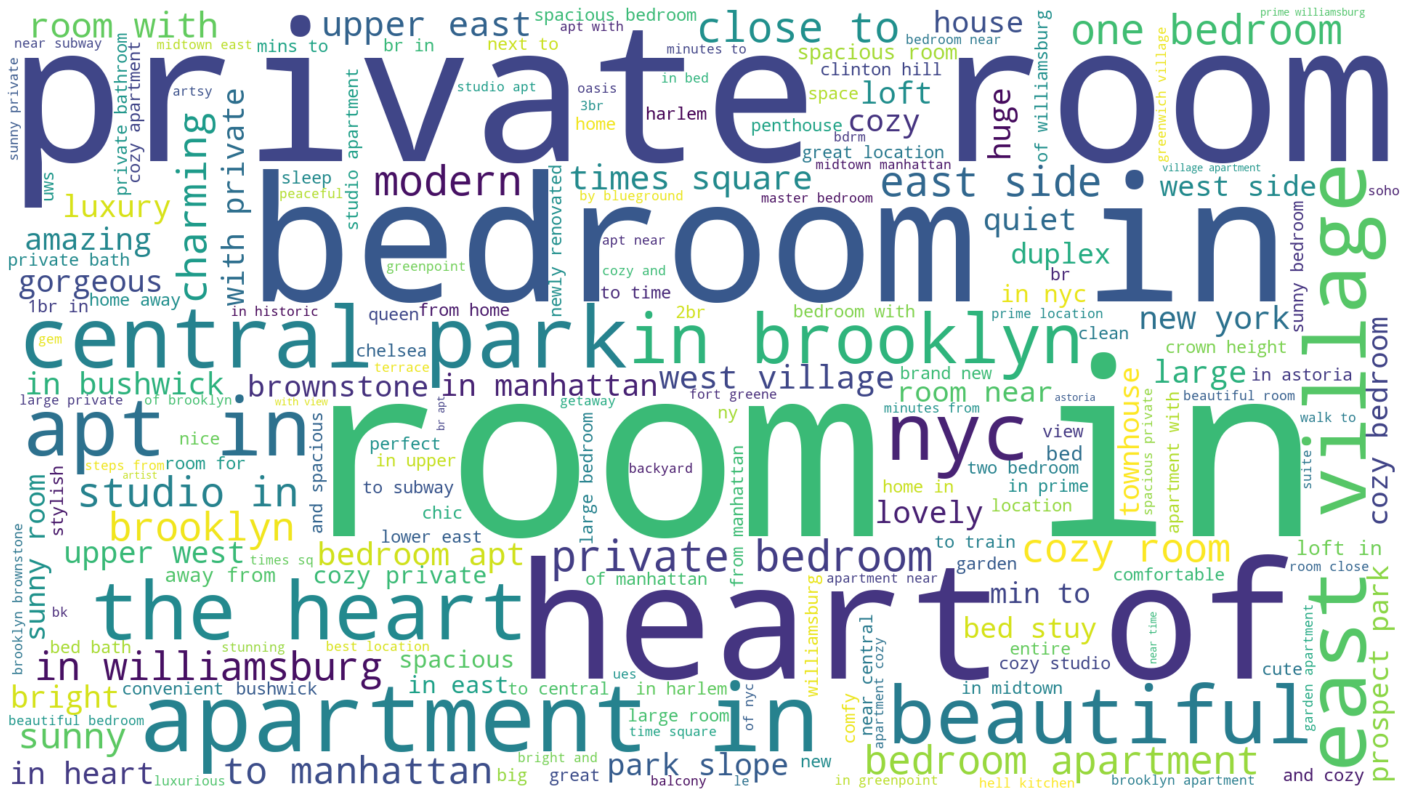

In [114]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080,
                          stopwords = stopwords 
                         ).generate(name_words)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.savefig('name_wordcloud.png')
plt.show()

### Data Preprocessing

#### replace the null values

In [ ]:
# Rreplace the 'reviews per month' by zero


In [156]:
df['reviews_per_month'].isnull().sum()

10052

In [157]:
df['reviews_per_month'].fillna(value =0,inplace=True)

In [159]:
df['reviews_per_month'].isnull().sum()

0

In [167]:
# Rreplace the 'host_name' by ' '
print(df['host_name'].isnull().sum())
df['host_name'].fillna(value =' ',inplace=True)

df['host_name'].isnull().sum()      

21


0

In [189]:
print(df.shape)

(48895, 16)


In [190]:
df = df[df['name'].notna()]
print(df.shape)
df['name'].isnull().sum()

(48879, 16)


0

#### prepare the data for model

In [201]:
columns = df.columns.tolist()
columns

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood_group',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365',
 'price']

In [228]:
num_cls = ['latitude','longitude', 'minimum_nights',
             'number_of_reviews','reviews_per_month',
             'calculated_host_listings_count',
             'availability_365',
             'price']
cat_groups = ['room_type','neighbourhood_group','neighbourhood']
# cat_groups = ['neighbourhood_group','room_type']

In [229]:
def process_product_group(df,cls,groups):
    """
    feature engineering:
        load numeric values
        get dummies on categorical
    """
    processed_df = df[cls]
    
    for group in groups:
    #Get the Dummy variables
        dummies = pd.get_dummies(df[group], prefix=group)
        processed_df = processed_df.join(dummies)
    return processed_df

In [230]:
processed_df = process_product_group(df,num_cls,cat_groups)

In [231]:
print(processed_df.shape)
processed_df.info()

(48879, 237)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48879 entries, 0 to 48894
Columns: 237 entries, latitude to neighbourhood_Woodside
dtypes: float64(3), int64(5), uint8(229)
memory usage: 15.3 MB


In [232]:
processed_df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Private room,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,40.64749,-73.97237,1,9,0.21,6,365,149,0,1,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,1,45,0.38,2,355,225,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,3,0,0.00,1,365,150,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,1,270,4.64,1,194,89,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,10,9,0.10,1,0,80,1,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
# write the processed dataframe to csv
processed_df.to_csv('data/processed_data.csv',index =None)

In [238]:
df1 = pd.read_csv('data/processed_data.csv')
df1.shape

(48879, 237)

In [244]:
df1 = df1[df1['price'] >0]

In [245]:
df1.price.describe()

count    48868.000000
mean       152.756732
std        240.202905
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [239]:
df1.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Private room,...,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside
0,40.64749,-73.97237,1,9,0.21,6,365,149,0,1,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,1,45,0.38,2,355,225,1,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,3,0,0.00,1,365,150,0,1,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,1,270,4.64,1,194,89,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,10,9,0.10,1,0,80,1,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
df1['log_price'] = np.log(df1.price)

/Users/nicochen/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [255]:
df1.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,room_type_Entire home/apt,room_type_Private room,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,log_price
0,40.64749,-73.97237,1,9,0.21,6,365,149,0,1,...,0,0,0,0,0,0,0,0,0,5.003946
1,40.75362,-73.98377,1,45,0.38,2,355,225,1,0,...,0,0,0,0,0,0,0,0,0,5.416100
2,40.80902,-73.94190,3,0,0.00,1,365,150,0,1,...,0,0,0,0,0,0,0,0,0,5.010635
3,40.68514,-73.95976,1,270,4.64,1,194,89,1,0,...,0,0,0,0,0,0,0,0,0,4.488636
4,40.79851,-73.94399,10,9,0.10,1,0,80,1,0,...,0,0,0,0,0,0,0,0,0,4.382027


In [265]:
plt.scatters(x = df1.number_of_reviews, y = df1.price)

TypeError: 'module' object is not callable

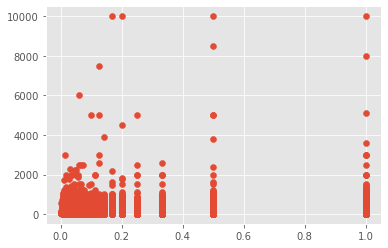

In [256]:
plt.scatter(x = 1/df1.number_of_reviews, y = df1.price)